# Linear regression with one and multiple variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

Ex. 1. Use the head and describe function to examine the data and display few columns.

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Ex. 2. Plot and analyze the data, where: x - population, y - profit.

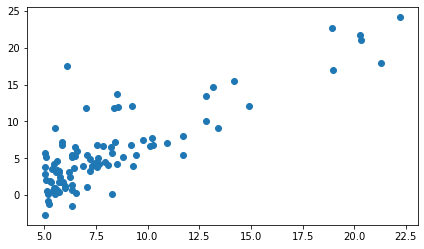

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax.scatter(data['Population'], data['Profit'])

Ex. 3. In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.

In [8]:
data.insert(0, "Ones", np.ones(97, dtype=int), True)
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


Ex 4. We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 3). Check with the head function if your implementation is correct:

In [13]:
X = data[['Ones', 'Population']]
y = data[['Profit']]

In [14]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

Ex. 6 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on $X$, $y$ and parameter $\theta$.

In [64]:
# def computeCost(X, Y, theta):
#     J = 0
#     for x, y in zip(X, Y):
#         J += np.square(x * theta.transpose() - y)
#     return J/(2*len(Y))

def computeCost(X, Y, theta):
    J = 0
    for x, y in zip(X, Y):
        J += np.square(x * theta.transpose() - y) # Przerobić na lambda
    return J/(2*len(Y))

Ex. 7 Test the cost function with ($\theta=0$).
Output: 32.07 (may differ…)

In [65]:
computeCost(X, y, theta)


matrix([[32.07273388]])

Ex. 8 Please implement the gradient descent algorithm:
    the function returns optimized values $\theta$
and a vector of the cost function value for each iteration

In [ ]:
def gradient_prosty(X, y, theta, alpha, it):
    # it - iteration nb.
    theta[0, 0] -= alpha * 2 * computeCost(X, y, theta)

    return theta, cost

0